# Sarah Thomas
# Project 4 - Personal Loan Campaign Modelling

__Description__ (copied from assignment)

__Background and Context__

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

__Objective__

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.
 

__Data Dictionary__
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# 1 - Load Packages and Read in the Dataset

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


import warnings

warnings.filterwarnings("ignore")

# to make Python code more structured
%load_ext nb_black

# Remove limit from displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
bank = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

# 2 - Data Preprocessing (Part 1 of 2)

## 2.1 - Check the first and last 10 rows of the dataset as well as 10 random rows

In [4]:
# first 10 rows
bank.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [5]:
# last 10 rows
bank.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [6]:
# random 10 rows
np.random.seed(1)
bank.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

__Observations:__
* ID can most likely be dropped.
* Zip codes can bias the dataset in a discriminatory way (e.g., serve as proxy for race) and so needs to be dropped.
* Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard all need to be converted to categorical variables.

## 2.2 - Check the shape of the data

In [7]:
bank.shape

(5000, 14)

<IPython.core.display.Javascript object>

## 2.3 - Check the datatypes and row counts for each column

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

__Observation:__ There are no null values. 

## 2.4 - Drop Values

In [9]:
# From above observations, dropping ID (not relevant) and zip code (don't want to introduce discriminatory bias)
bank.drop(["ID"], axis=1, inplace=True)
bank.drop(["ZIPCode"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# 3 - EDA

## 3.1 - Explore Summary of Data

In [11]:
bank.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

__Observations:__
* Experience has negative values - need to treat variable so that min = 0.
* For Age, mean (45.3) is close to median (45.0). Indicates a symetrical distribution.
* For Income, the mean (73.77) is greater than the median (64.0). Indicates a right-skewed distribution.
* For Family, the mean (2.4) is close to the median (2.0). Indicates a symetrical distribution.
* For CCAvg, the mean (1.94) is greater than the median (1.5). Indicates a right-skewed distribution.

## 3.2 - Treat Experience

In [18]:
# Negative values need to be replaced with 0
bank.loc[bank["Experience"] < 0] = 0
bank["Experience"].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
14    127
16    127
30    126
27    125
17    125
34    125
29    124
22    124
7     121
15    119
8     119
6     119
0     118
10    118
13    117
33    117
37    116
11    116
36    114
4     113
21    113
31    104
12    102
38     88
39     85
2      85
1      74
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

## 3.3 - Univariate Analysis

In [12]:
# Function copied from prior case study:
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [25]:
# Function copied from prior cae study:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### 3.3.1 - Explore dependent variable Personal_Loan

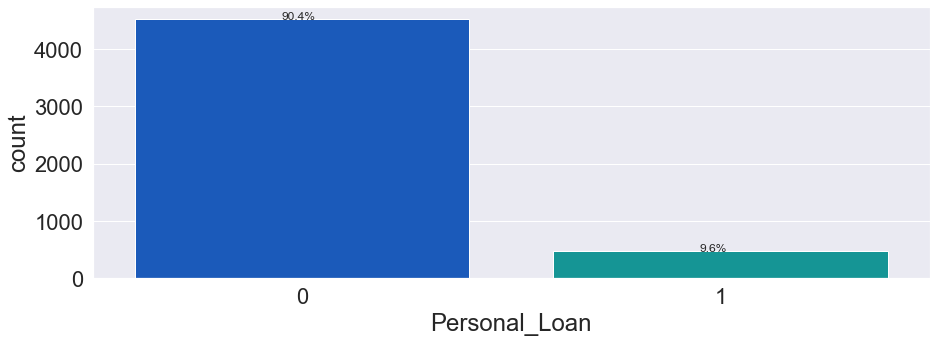

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["Personal_Loan"], palette="winter")
perc_on_bar(ax, bank["Personal_Loan"])

__Observation:__ 90.4% did not accept the personal loan offered in the last campaign.

### 3.3.2 - Age

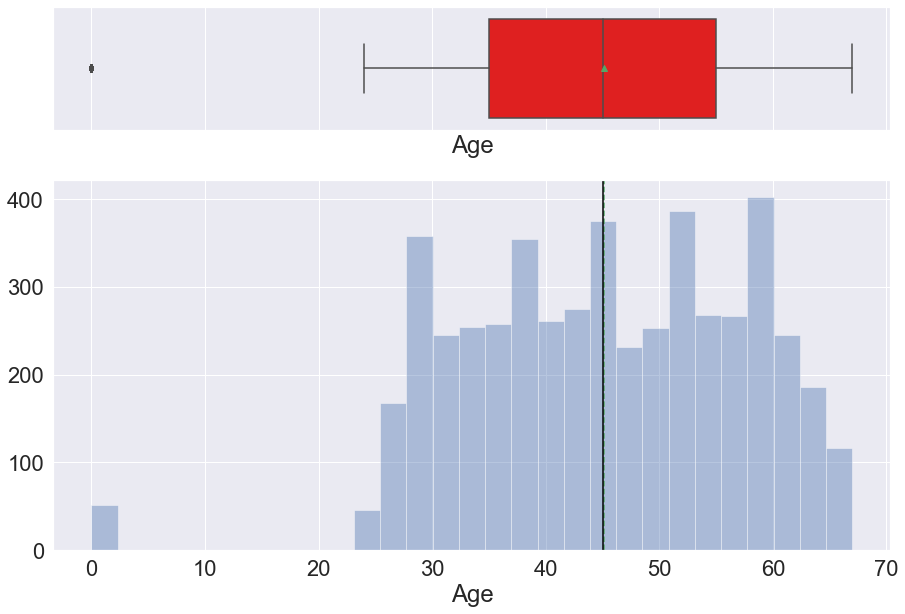

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(bank["Age"])

__Observation:__ Aside from outlier, age seems to be symmetrically distributed. Outliers will need to be treated.

### 3.3.3 - Experience

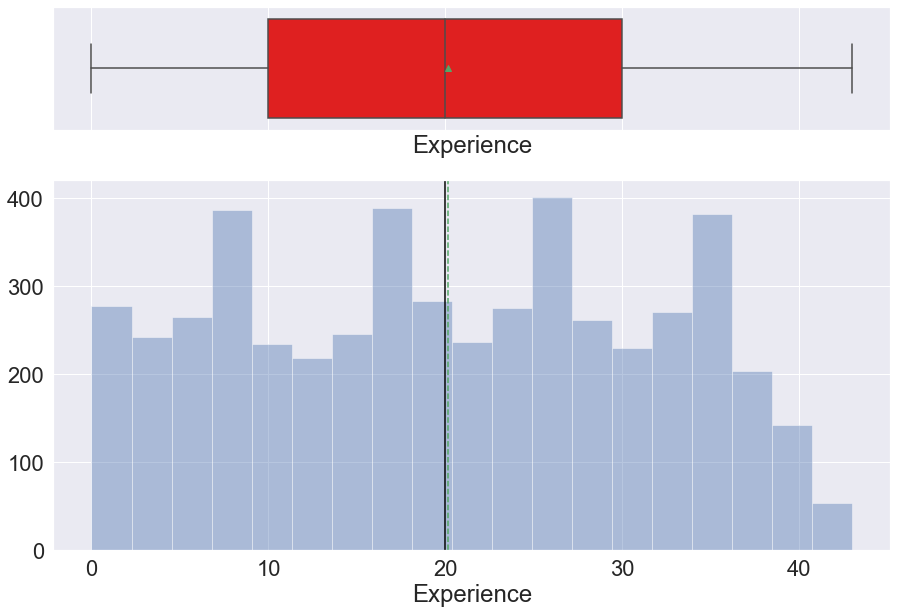

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(bank["Experience"])

__Observation:__ Experience seems symmetrically distributed.

### 3.3.4 - Income

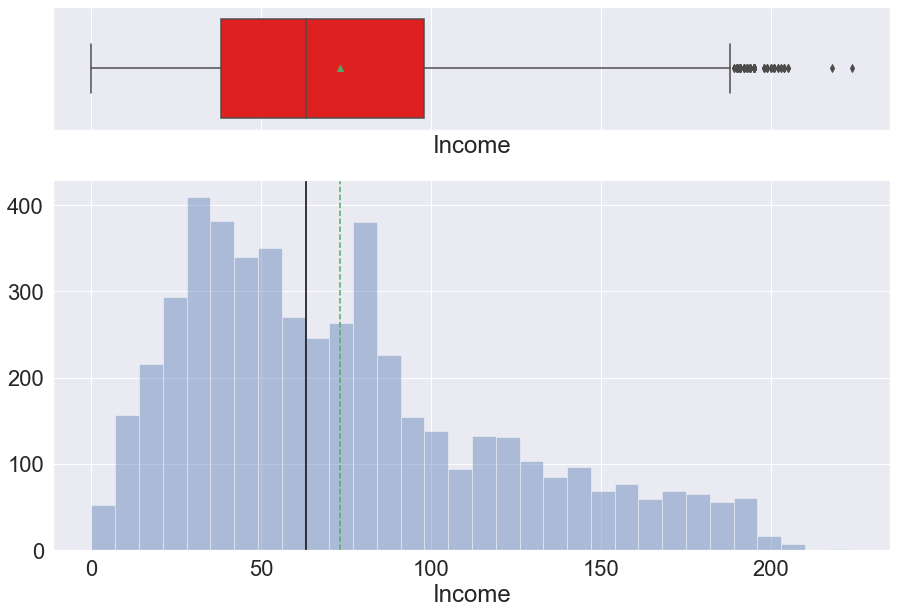

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(bank["Income"])

__Observation:__ Income is right-skewed. Outliers will need to be treated.

### 3.3.5 - Family 

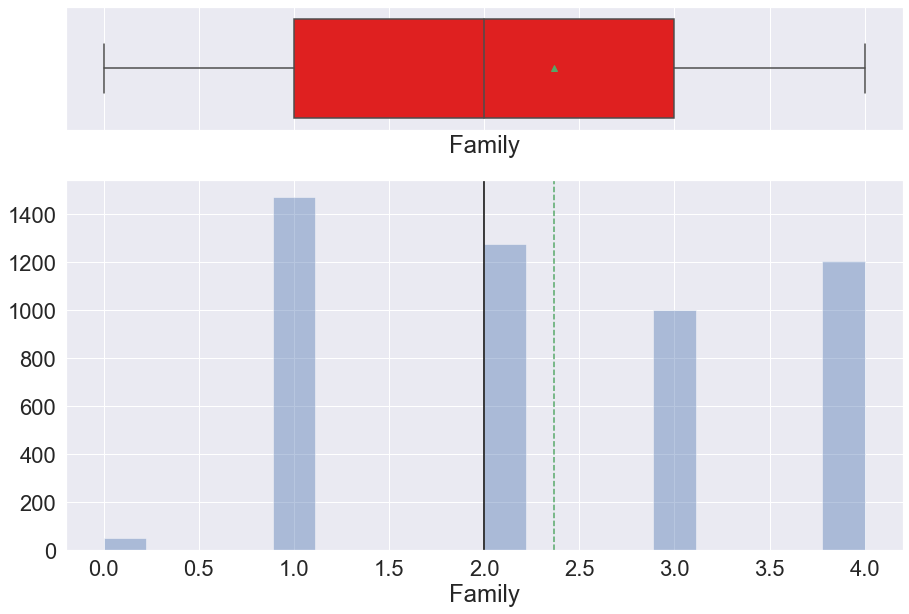

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(bank["Family"])

__Observation:__ There seem to be values of "0" for family which doesn't make sense. This discrepancy will need to be treated.

### 3.3.6 - CCAvg

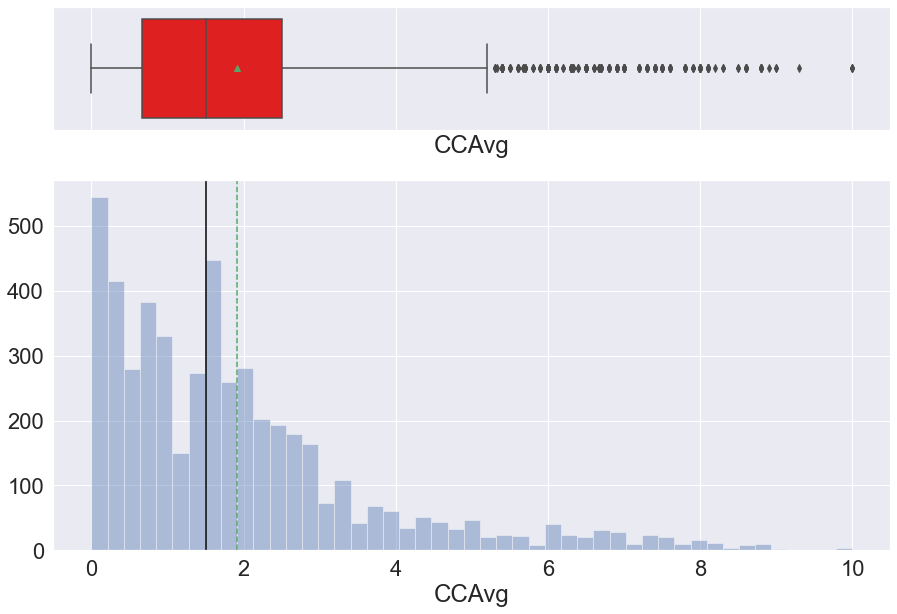

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(bank["CCAvg"])

__Observation:__ CCAvg is skewed right. Outliers will need to be treated.

### 3.3.7 - Education

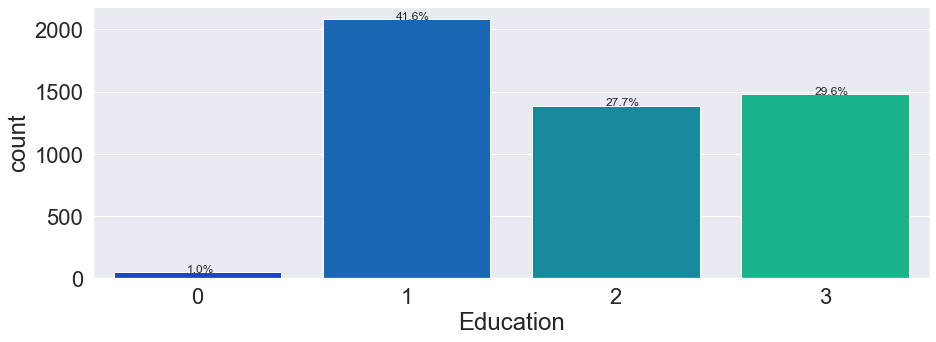

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["Education"], palette="winter")
perc_on_bar(ax, bank["Education"])

__Observation:__ Most customers have at least an undergraduate degree (41.6%). 1.0% do not have a degree.

### 3.3.8 - Mortgage

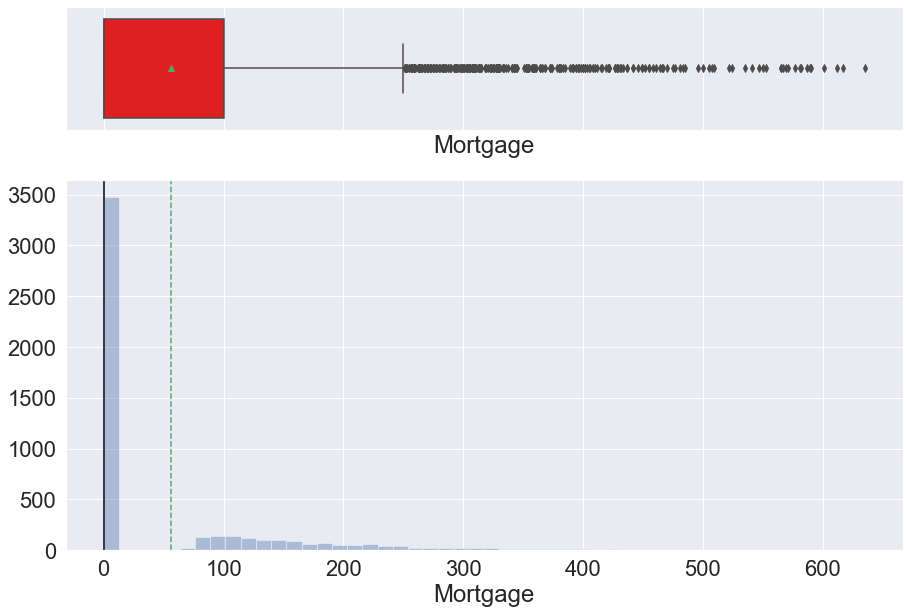

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(bank["Mortgage"])

__Observation:__ Mortgage is right skewed. Outliers will need to be treated.

### 3.3.9 - Securities_Account

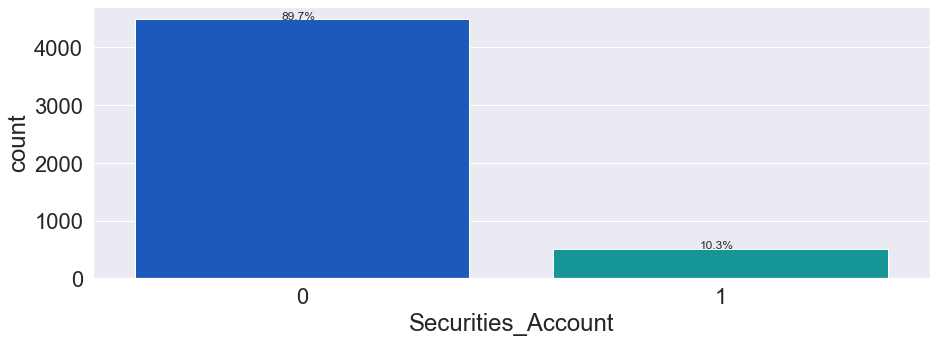

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["Securities_Account"], palette="winter")
perc_on_bar(ax, bank["Securities_Account"])

__Observation:__ Most customers do not have a securities account (89.7%).

### 3.3.10 - CD_Account

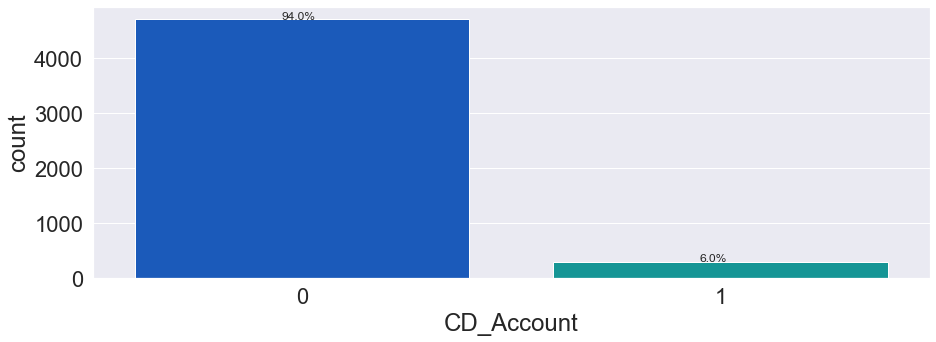

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["CD_Account"], palette="winter")
perc_on_bar(ax, bank["CD_Account"])

__Observation:__ Most customers do not have a CD account (94%).

### 3.3.11 - Online

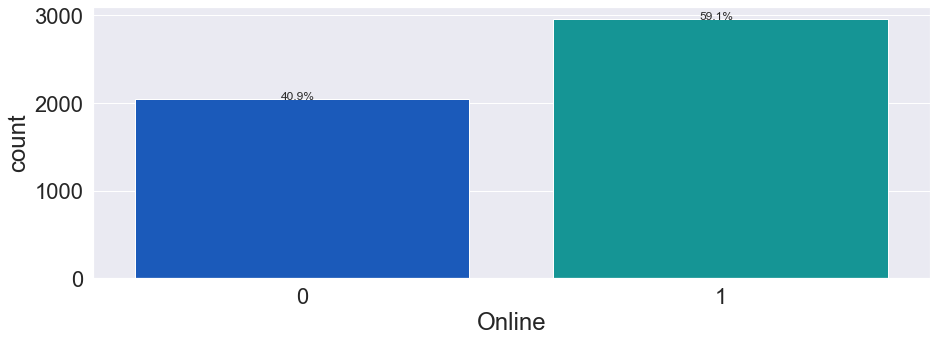

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["Online"], palette="winter")
perc_on_bar(ax, bank["Online"])

__Observation:__ Most customers use online banking (59.1%).

### 3.3.12 - CreditCard

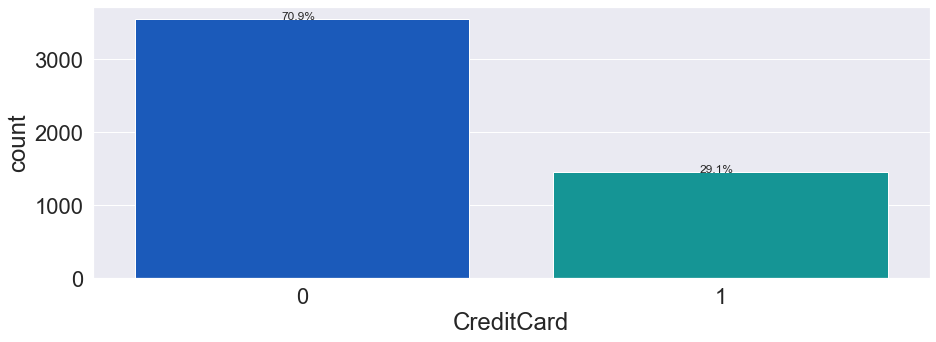

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(bank["CreditCard"], palette="winter")
perc_on_bar(ax, bank["CreditCard"])

__Observation:__ Most customers do not use a credit card from another bank (70.9%).

## 3.4 - Bivariate Analysis

<AxesSubplot:>

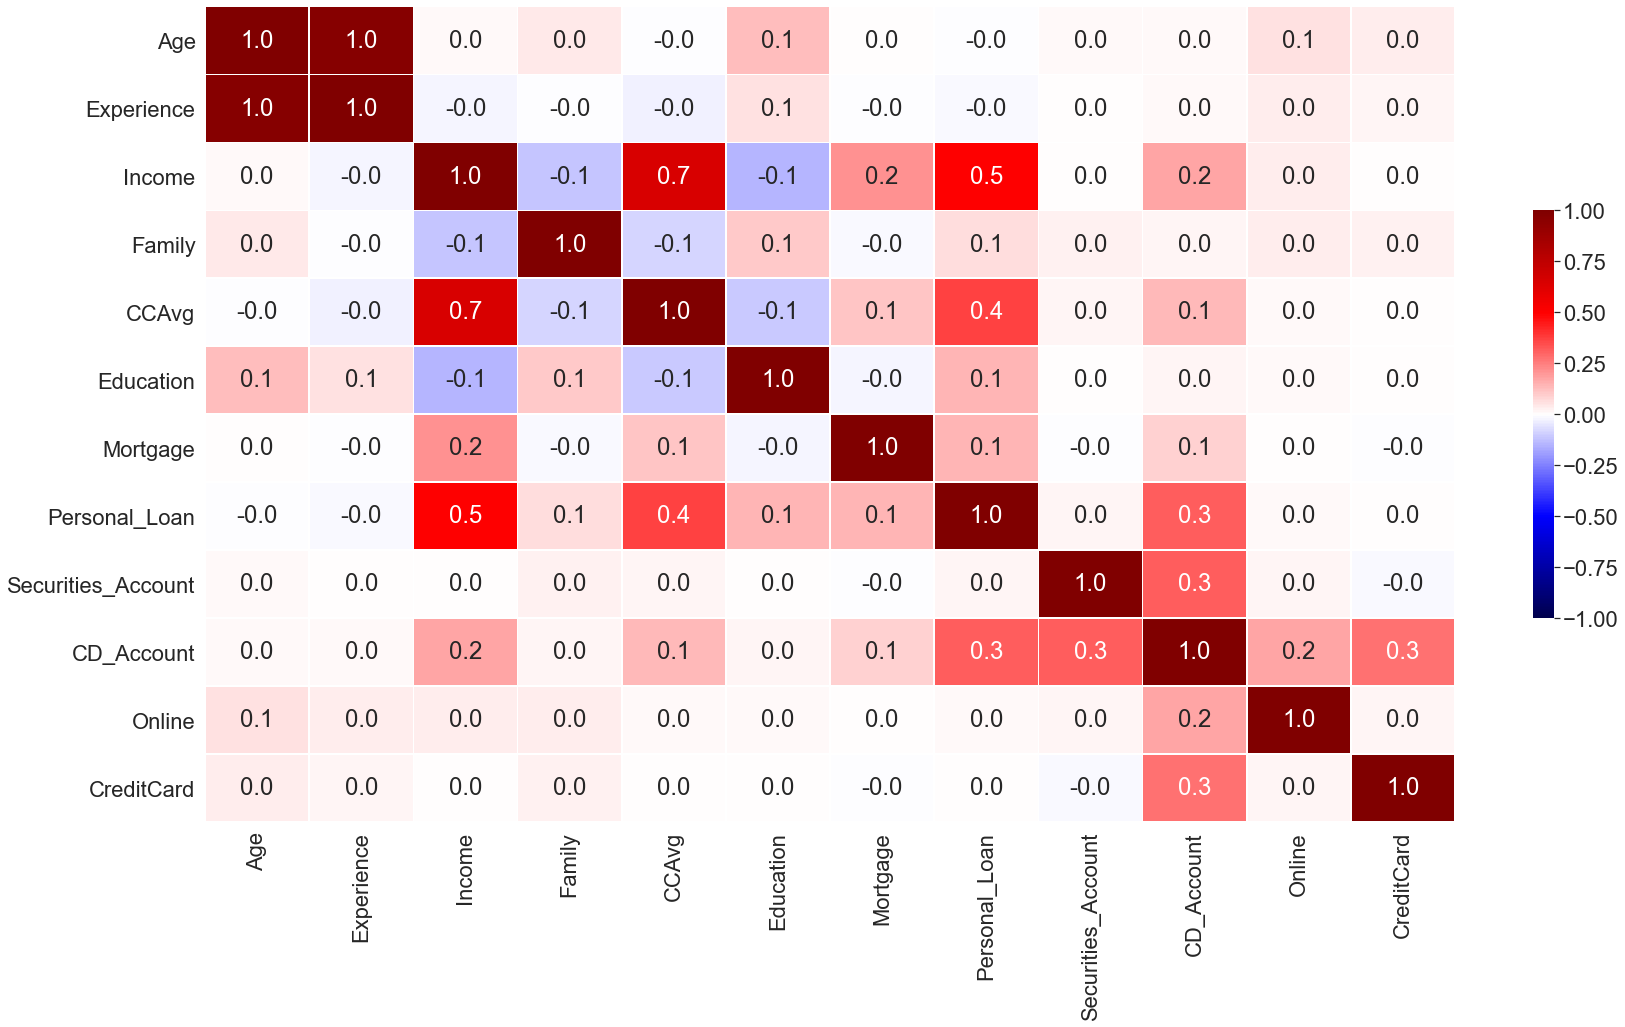

<IPython.core.display.Javascript object>

In [43]:
# Taken/customized from a previous case study:
numeric_columns = bank.select_dtypes(include=np.number).columns.tolist()

corr = bank[numeric_columns].corr()  # sorting correlations

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap="seismic",
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

__Observations:__
* Age and Experience are perfectly correlated. Since they are telling the same story, I will drop Age.
* High correlation between Income and CCAvg.
* Moderate correlation between Personal_Loan and Income, Personal_Loan and CCAvg.
* Slight correlation between Income and CD_Account, Income and Mortgage, Personal_Loan and CD_Account, Securities_Account and CD_Account, CD_Account and CreditCard, CD_Account and Online.

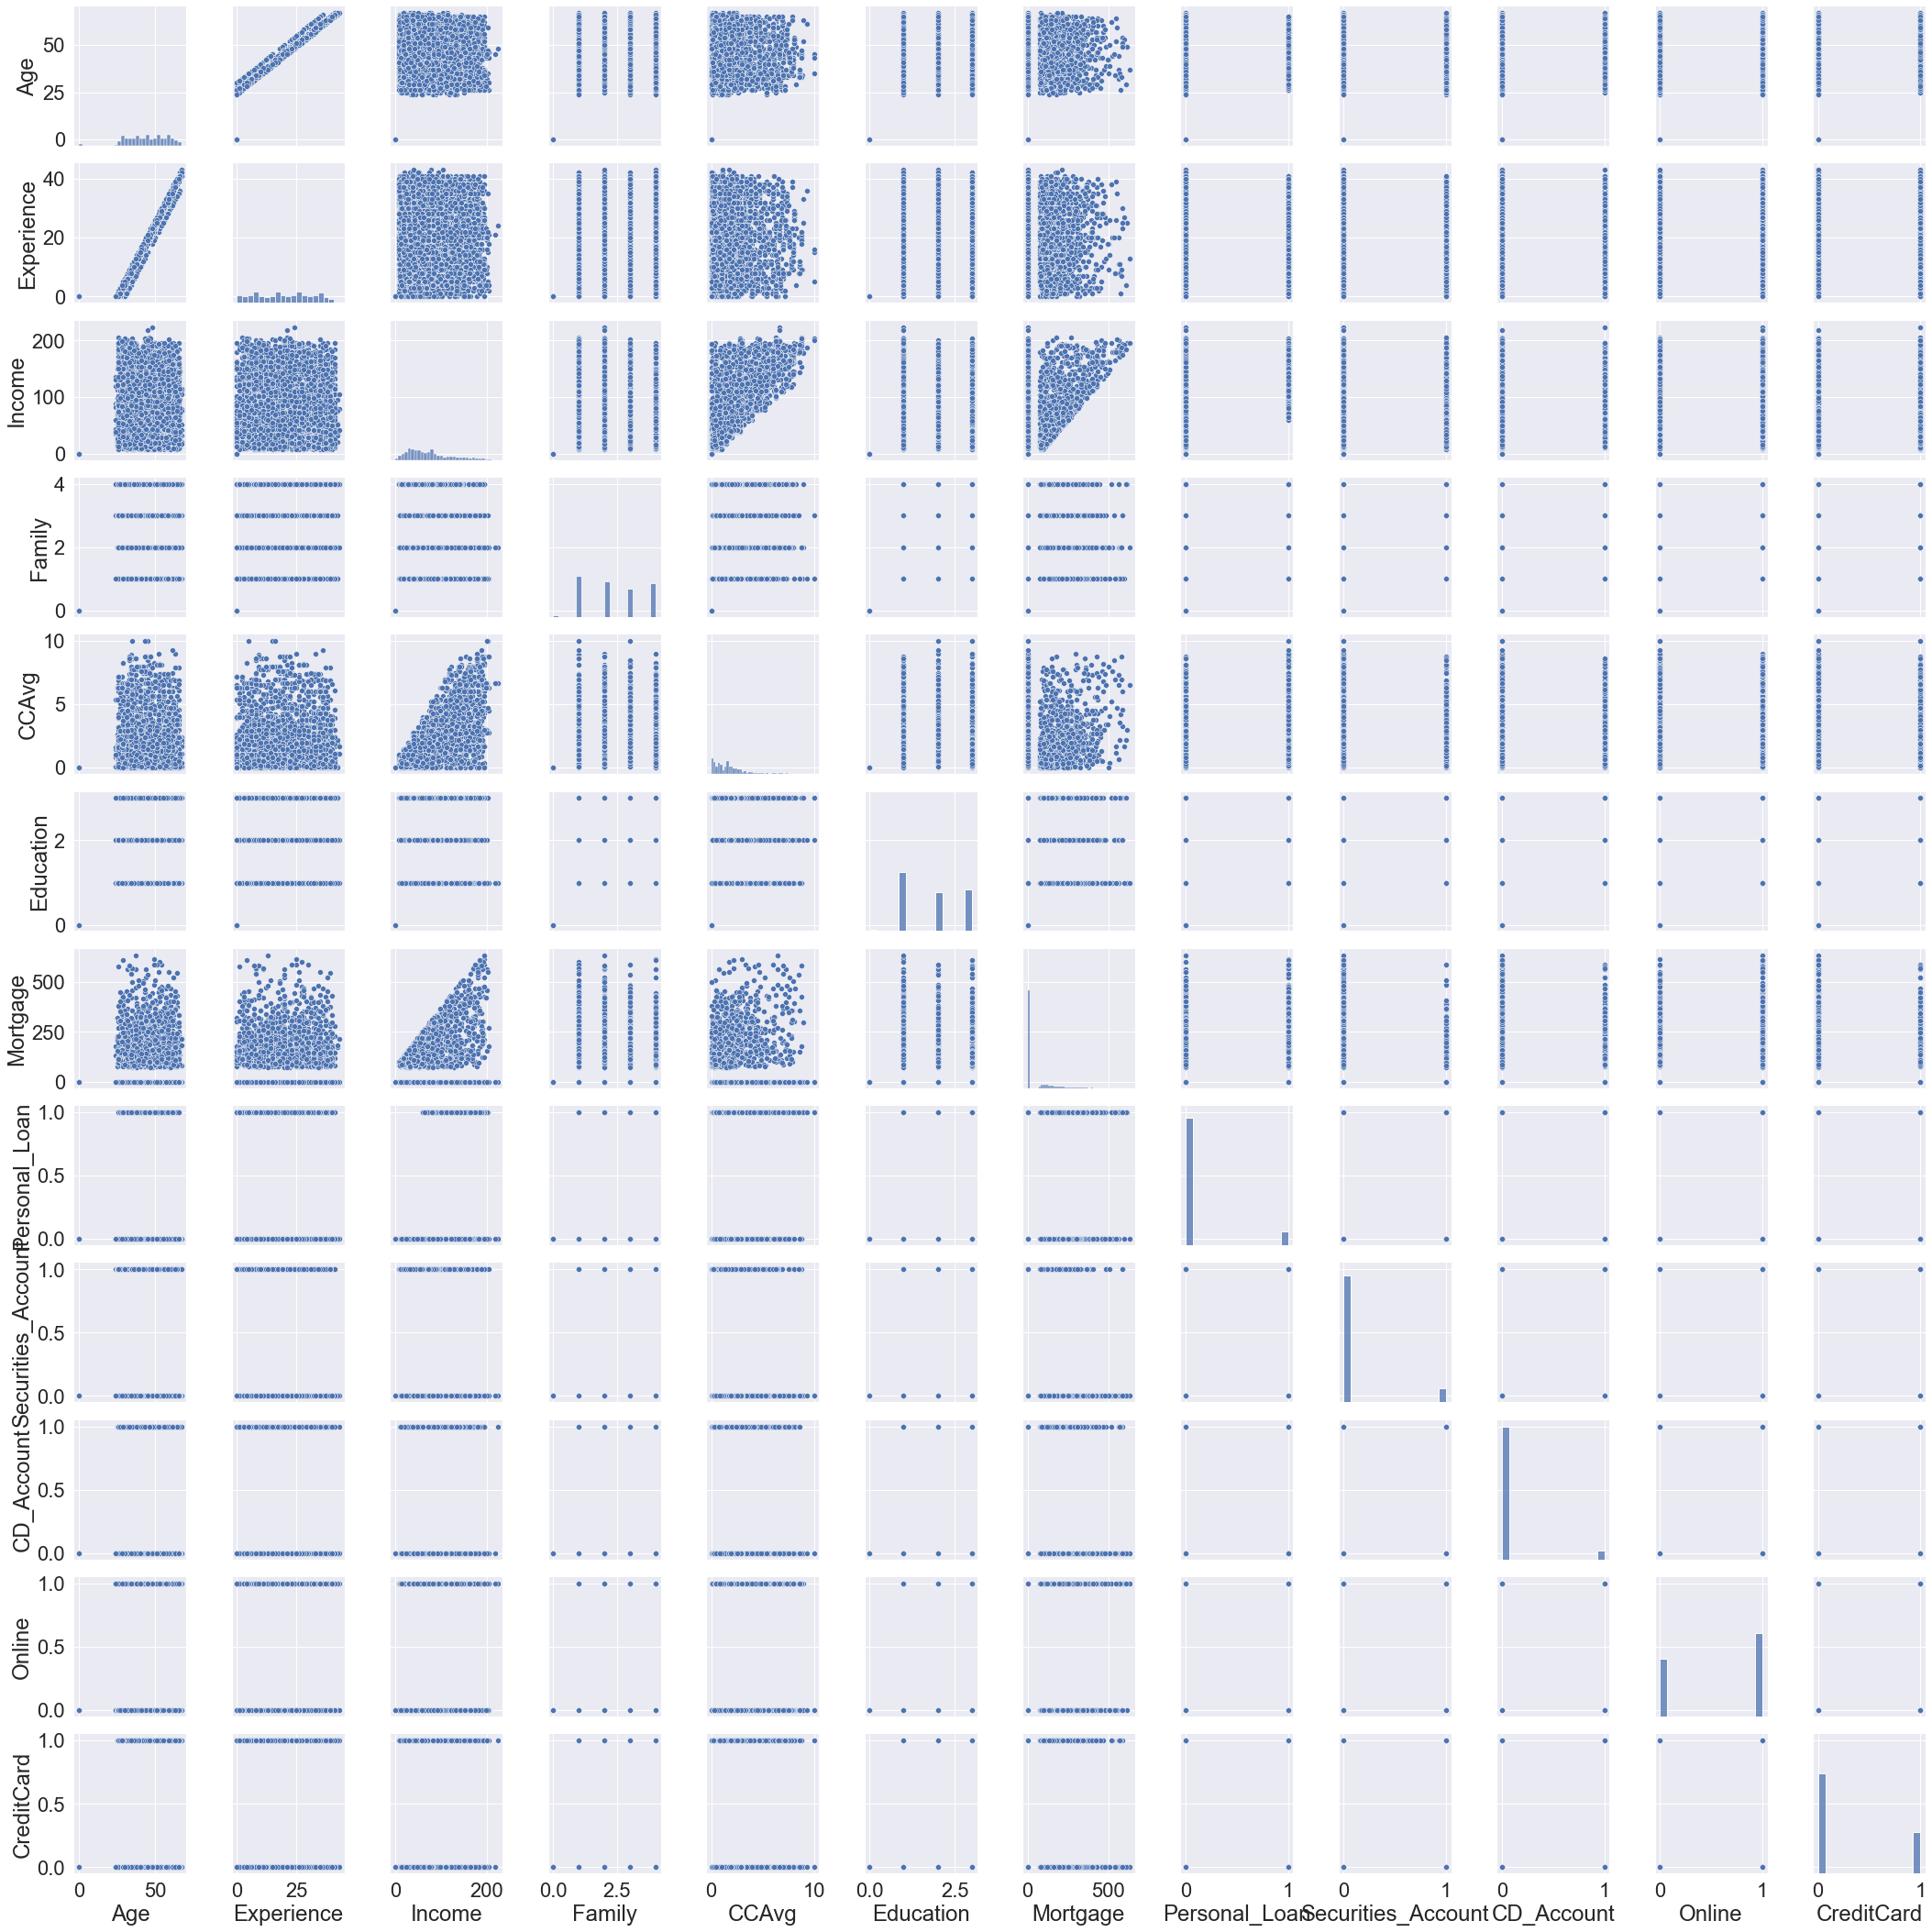

<IPython.core.display.Javascript object>

In [44]:
sns.pairplot(data=bank)
plt.show()

### 3.4.1 - Income and CCAvg with Personal_Loan

<AxesSubplot:xlabel='CCAvg', ylabel='Income'>

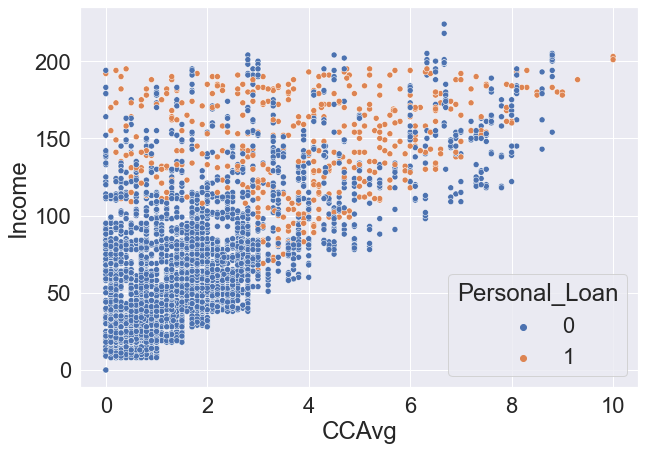

<IPython.core.display.Javascript object>

In [47]:
# Explore moderate and high correlations by plotting Income, CCAvg, and Personal_Loan
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Income", x="CCAvg", hue="Personal_Loan", data=bank)

__Observation:__ Higher income and higher monthly spending on credit card seems to correspond with acceptance of personal loan.

## 3.5 - Insights from EDA (Summary)

* Experience has negative values so treated variable so that min now equals 0. Based on plot, Experience seems symmetrically distributed.
* For Age, mean (45.3) is close to median (45.0). Indicates a symmetrical distribution. However, after exploring heatmap, see that Age and Experience are perfectly correlated (telling the same story) so I will drop Age.
* For Income, the mean (73.77) is greater than the median (64.0). Indicates a right-skewed distribution. Outliers will need to be treated.
* For Family, the mean (2.4) is close to the median (2.0). Indicates a symetrical distribution. There seem to be values of "0" for family which doesn't make sense. This discrepancy will need to be treated.
* For CCAvg, the mean (1.94) is greater than the median (1.5). Indicates a right-skewed distribution. Outliers will need to be treated.
* 90.4% did not accept the personal loan offered in the last campaign.
* Most customers have at least an undergraduate degree (41.6%). 1.0% do not have a degree.
* Mortgage is right skewed. Outliers will need to be treated.
* Most customers do not have a securities account (89.7%).
* Most customers do not have a CD account (94%).
* Most customers use online banking (59.1%).
* Most customers do not use a credit card from another bank (70.9%).
* High correlation exists between Income and CCAvg.
* Moderate correlation exists between Personal_Loan and Income, Personal_Loan and CCAvg.
* Slight correlation exists between Income and CD_Account, Income and Mortgage, Personal_Loan and CD_Account, Securities_Account and CD_Account, CD_Account and CreditCard, CD_Account and Online.
* Higher income and higher monthly spending on credit card seems to correspond with acceptance of personal loan.

# 4 - Data Preprocessing (Part 2 of 2)

## 4.1 - Drop Columns as Needed

In [48]:
# Drop Age - perfectly correlated with Experience
bank.drop(["Age"], axis=1, inplace=True)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal_Loan       5000 non-null   int64  
 7   Securities_Account  5000 non-null   int64  
 8   CD_Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


<IPython.core.display.Javascript object>

## 4.2 - Treat Outliers

In [50]:
# Treating outliers with capping for Income, CCAvg, and Mortgage

<IPython.core.display.Javascript object>

In [51]:
# Taking the following 2 functions from previous case study
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [52]:
# Treat Outliers
numerical_col = ["Income", "CCAvg", "Mortgage"]
bank = treat_outliers_all(bank, numerical_col)

<IPython.core.display.Javascript object>

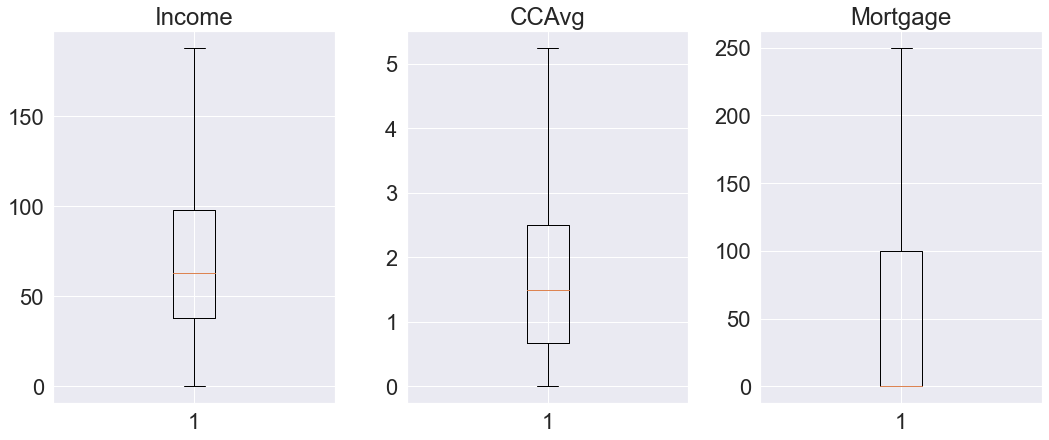

<IPython.core.display.Javascript object>

In [53]:
# Check to see if outliers were treated
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(bank[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## 4.3 - Treat Zero Values for Family

In [54]:
# Number has to be at least 1, so will replace zero with 1
bank.loc[bank["Family"] == 0] = 1
bank["Family"].value_counts()

1    1522
2    1274
4    1203
3    1001
Name: Family, dtype: int64

<IPython.core.display.Javascript object>

## 4.4 - Convert Categorical Variables

In [55]:
bank["Education"] = bank["Education"].astype("category")
bank["Personal_Loan"] = bank["Personal_Loan"].astype("category")
bank["Securities_Account"] = bank["Securities_Account"].astype("category")
bank["CD_Account"] = bank["CD_Account"].astype("category")
bank["Online"] = bank["Online"].astype("category")
bank["CreditCard"] = bank["CreditCard"].astype("category")

<IPython.core.display.Javascript object>

## 4.5 - One Hot Encode Education

In [56]:
# Since all the other categorical variables are already "0 or 1", I am only going to encode Education
# Education_0 is dropped
bank = pd.get_dummies(bank, columns=["Education"])
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Experience          5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   int64   
 3   CCAvg               5000 non-null   float64 
 4   Mortgage            5000 non-null   int64   
 5   Personal_Loan       5000 non-null   category
 6   Securities_Account  5000 non-null   category
 7   CD_Account          5000 non-null   category
 8   Online              5000 non-null   category
 9   CreditCard          5000 non-null   category
 10  Education_1         5000 non-null   uint8   
 11  Education_2         5000 non-null   uint8   
 12  Education_3         5000 non-null   uint8   
dtypes: category(5), float64(1), int64(4), uint8(3)
memory usage: 235.1 KB


<IPython.core.display.Javascript object>

# 5 - LR Modeling

In [57]:
# create a new dataset for LR modeling
lrbank = bank

<IPython.core.display.Javascript object>

## 5.1 - Split the data

In [59]:
from sklearn.model_selection import train_test_split

X = lrbank.drop("Personal_Loan", axis=1)  # Predictor feature columns
Y = lrbank["Personal_Loan"]  # Predicted class

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

<IPython.core.display.Javascript object>

In [60]:
x_train.head()

,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
1334,22,35,2,1.3,0,0,0,1,0,1,0,0
4768,14,39,1,2.0,0,0,0,1,0,0,1,0
65,35,131,1,3.8,0,0,0,1,1,1,0,0
177,3,65,4,1.8,244,0,0,0,0,0,1,0
4489,13,21,3,0.2,0,0,0,1,0,0,1,0


<IPython.core.display.Javascript object>

## 5.2 - Logistic Regression with SKLearn

In [61]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
# predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df["intercept"] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.039052  0.028005  0.115393  0.303948 -0.000598  0.354453  3.653323   

          7         8         9        10        11  intercept  
0 -0.365633 -0.507202 -2.494097 -0.705473 -0.667438  -3.867008  


<IPython.core.display.Javascript object>

## 5.3 - Evaluate the Model (SKLearn)

In [64]:
# Function copied from Case Study
# The get_metrics_score2 function will be used to check the model performance of models built using the Sklearn library.
def get_metrics_score2(model, train, test, train_y, test_y, flag=True, roc=False):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict(train)
    pred_test = model.predict(test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        print("ROC-AUC Score on training set : ", roc_auc_score(train_y, pred_train))
        print("ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [67]:
# Checking scores for model
scores_LR = get_metrics_score2(model, x_train, x_test, y_train, y_test)

Accuracy on training set :  0.9291428571428572
Accuracy on test set :  0.9346666666666666
Recall on training set :  0.46648793565683644
Recall on test set :  0.5031446540880503
Precision on training set :  0.7802690582959642
Precision on test set :  0.8080808080808081
F1 on training set :  0.5838926174496645
F1 on test set :  0.6201550387596899


<IPython.core.display.Javascript object>

## 5.4 - LR Model with statsmodels

In [71]:
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.181464
         Iterations 8


<IPython.core.display.Javascript object>

## 5.5 - Evaluate Model (statsmodels)

In [72]:
def get_metrics_score1(
    model, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict(train) > threshold
    pred_test = model.predict(test) > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        )
    )

    if flag == True:
        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        print("ROC-AUC Score on training set : ", roc_auc_score(train_y, pred_train))
        print("ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [73]:
# Checking performance of model
scores_LR = get_metrics_score1(lg, x_train, x_test, y_train, y_test)

Accuracy on training set :  0.9294285714285714
Accuracy on test set :  0.9353333333333333
Recall on training set :  0.4772117962466488
Recall on test set :  0.5220125786163522
Precision on training set :  0.7739130434782608
Precision on test set :  0.7980769230769231
F1 on training set :  0.5903814262023217
F1 on test set :  0.6311787072243347


<IPython.core.display.Javascript object>

In [74]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                  0.4652
Time:                        10:44:24   Log-Likelihood:                -635.12
converged:                       True   LL-Null:                       -1187.5
Covariance Type:            nonrobust   LLR p-value:                5.362e-230
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Experience            -0.0379      0.007     -5.597      0.000      -0.051      -0.025
Income                 0.0296      0.002     14.114      0.000       0.025       0.034
Family                 0.1600      0.070      2.274      0.023       0.022       0.298
CCAvg                  0.3226      0.057      5.695      0.000       0.212       0.434
Mortgage              -0.0006      0.001     -0.723      0.470      -0.002       0.001
Securities_Account     0.3379      0.240      1.408      0.159      -0.133       0.808
CD_Account             3.9865      0.308     12.931      0.000       3.382       4.591
Online                -0.3740      0.161     -2.318      0.020      -0.690      -0.058
CreditCard            -0.5908      0.204     -2.890      0.004      -0.991      -0.190
Education_1           -6.8179      0.372    -18.323      0.000      -7.547      -6.089
Education_2           -4.9309      0.345    -14.275      0.000      -5.608      -4.254
Education_3           -4.8863      0.339    -14.397      0.000      -5.552      -4.221
======================================================================================
"""

<IPython.core.display.Javascript object>

In [76]:
# Check for multicollinearity
X_train_num = x_train.astype(float).copy()

vif_series1 = pd.Series(
    [
        variance_inflation_factor(X_train_num.values, i)
        for i in range(X_train_num.shape[1])
    ],
    index=X_train_num.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

Experience            1.008684
Income                1.783714
Family                1.039878
CCAvg                 1.708400
Mortgage              1.020578
Securities_Account    1.239188
CD_Account            1.456789
Online                1.048720
CreditCard            1.141419
Education_1           7.074870
Education_2           4.970281
Education_3           4.934705
dtype: float64



<IPython.core.display.Javascript object>

__Observation:__ There seems to be no major issue with multicollinearity in the model.

## 5.6 - Comments on Model Evaluation

In deciding the optimal prediction metric, we consider whether we would rather lessen:
- False Positives: We predict that customers will say no to loans when they would say yes, or
- False Negatives: We predict that customers will say yes to loans but they say no.

It is better not to shut potential customers out, so we should lessen false positives. The metric we should pay attention to is Precision.

SKLearn Model Precision for Training Data: 0.7802690582959642
SKLearn Model Precision for Test Data: 0.8080808080808081

StatsModels Precision for Training Data: 0.7739130434782608
StatsModels Precision for Test Data: 0.7980769230769231

Performance was slightly better for SKLearn model.

In [84]:
# Function copied from Case Study
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

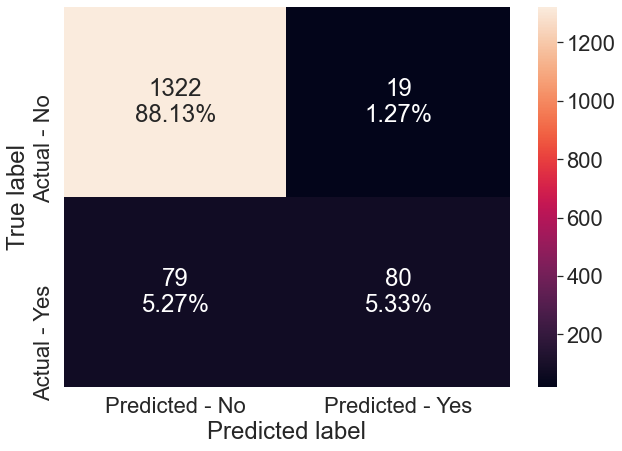

<IPython.core.display.Javascript object>

In [85]:
# Make confusion matrix for SKLearn Model (higher precision model)
make_confusion_matrix(model, y_test)

# 6 - Decision Tree

## 6.1 - Model and Evaluate Decision Tree

In [86]:
dtmodel = DecisionTreeClassifier(criterion="gini", random_state=1)
dtmodel.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [89]:
# Checking scores for model
scores_DT = get_metrics_score2(dtmodel, x_train, x_test, y_train, y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.9806666666666667
Recall on training set :  1.0
Recall on test set :  0.9119496855345912
Precision on training set :  1.0
Precision on test set :  0.90625
F1 on training set :  1.0
F1 on test set :  0.9090909090909092


<IPython.core.display.Javascript object>

__Observation:__ Metrics on the training set might lead me to think there is overfitting but the metrics are also high on the test set. Model peforms better than logistic regression.

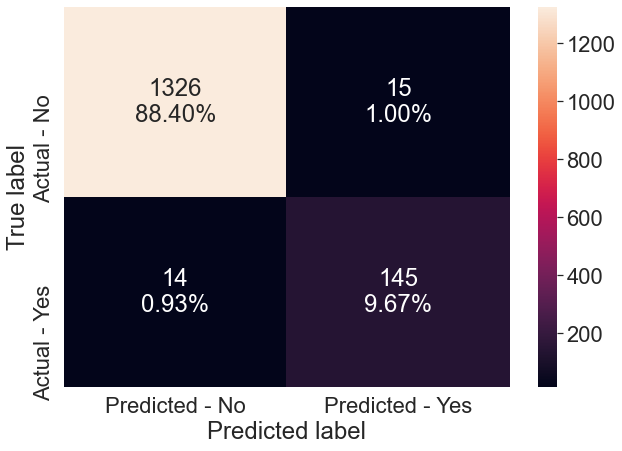

<IPython.core.display.Javascript object>

In [91]:
# Make confusion matrix for decision tree model
make_confusion_matrix(dtmodel, y_test)

## 6.2 - Visualization of Decision Tree

In [92]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3']


<IPython.core.display.Javascript object>

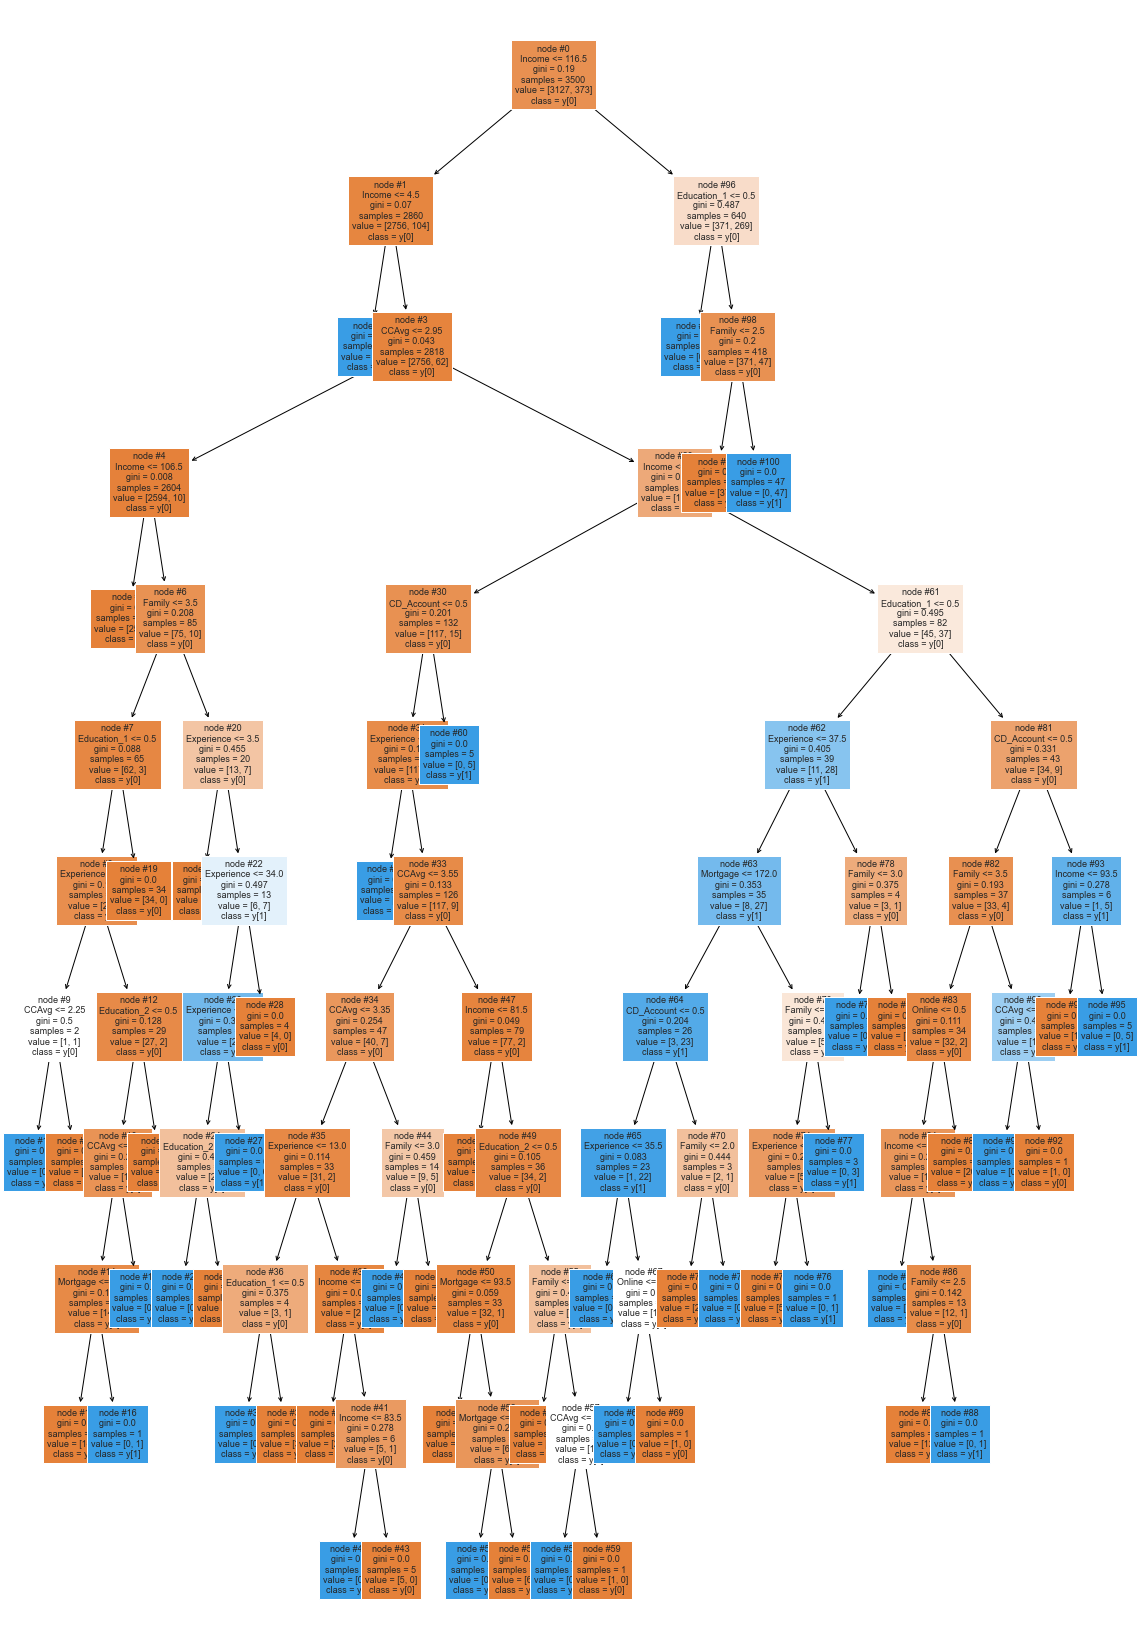

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    dtmodel,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## 6.3 - Feature Importances

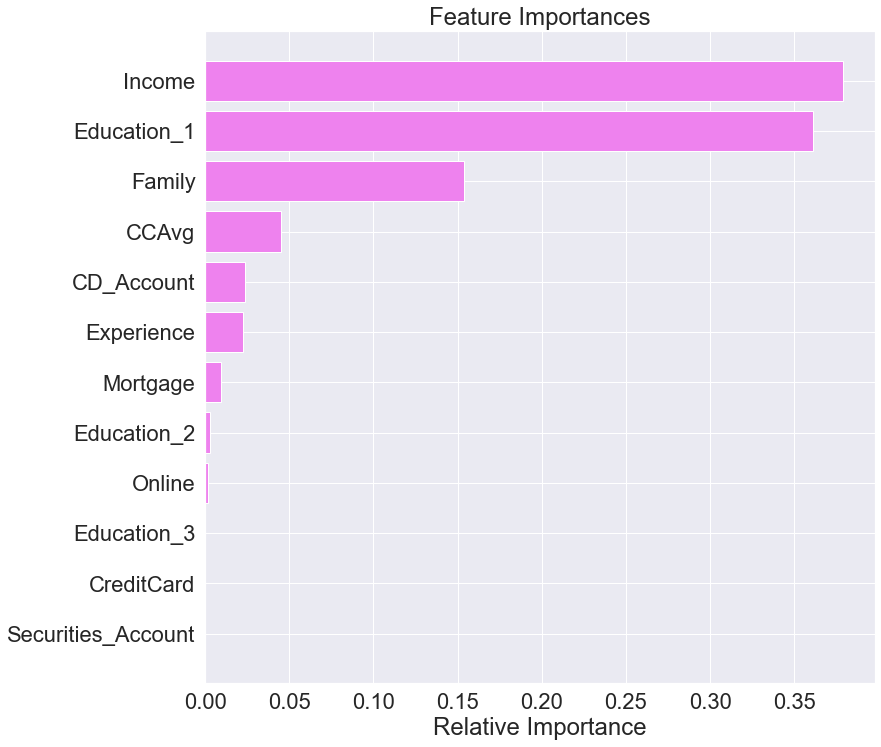

<IPython.core.display.Javascript object>

In [94]:
importances = dtmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## 6.4 - Tune the Decision Tree Model

For ease of explainability, I want to limit the depth of the decision tree.

In [95]:
estimator = DecisionTreeClassifier(random_state=1)

parameters = {"max_depth": [3]}

acc_scorer = metrics.make_scorer(metrics.precision_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

estimator = grid_obj.best_estimator_

estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

<IPython.core.display.Javascript object>

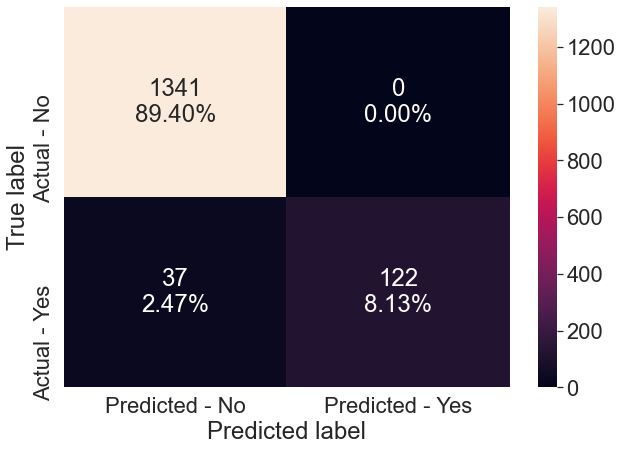

<IPython.core.display.Javascript object>

In [96]:
make_confusion_matrix(estimator, y_test)

__Observation:__ Decision tree still performs well and maximized Precision.

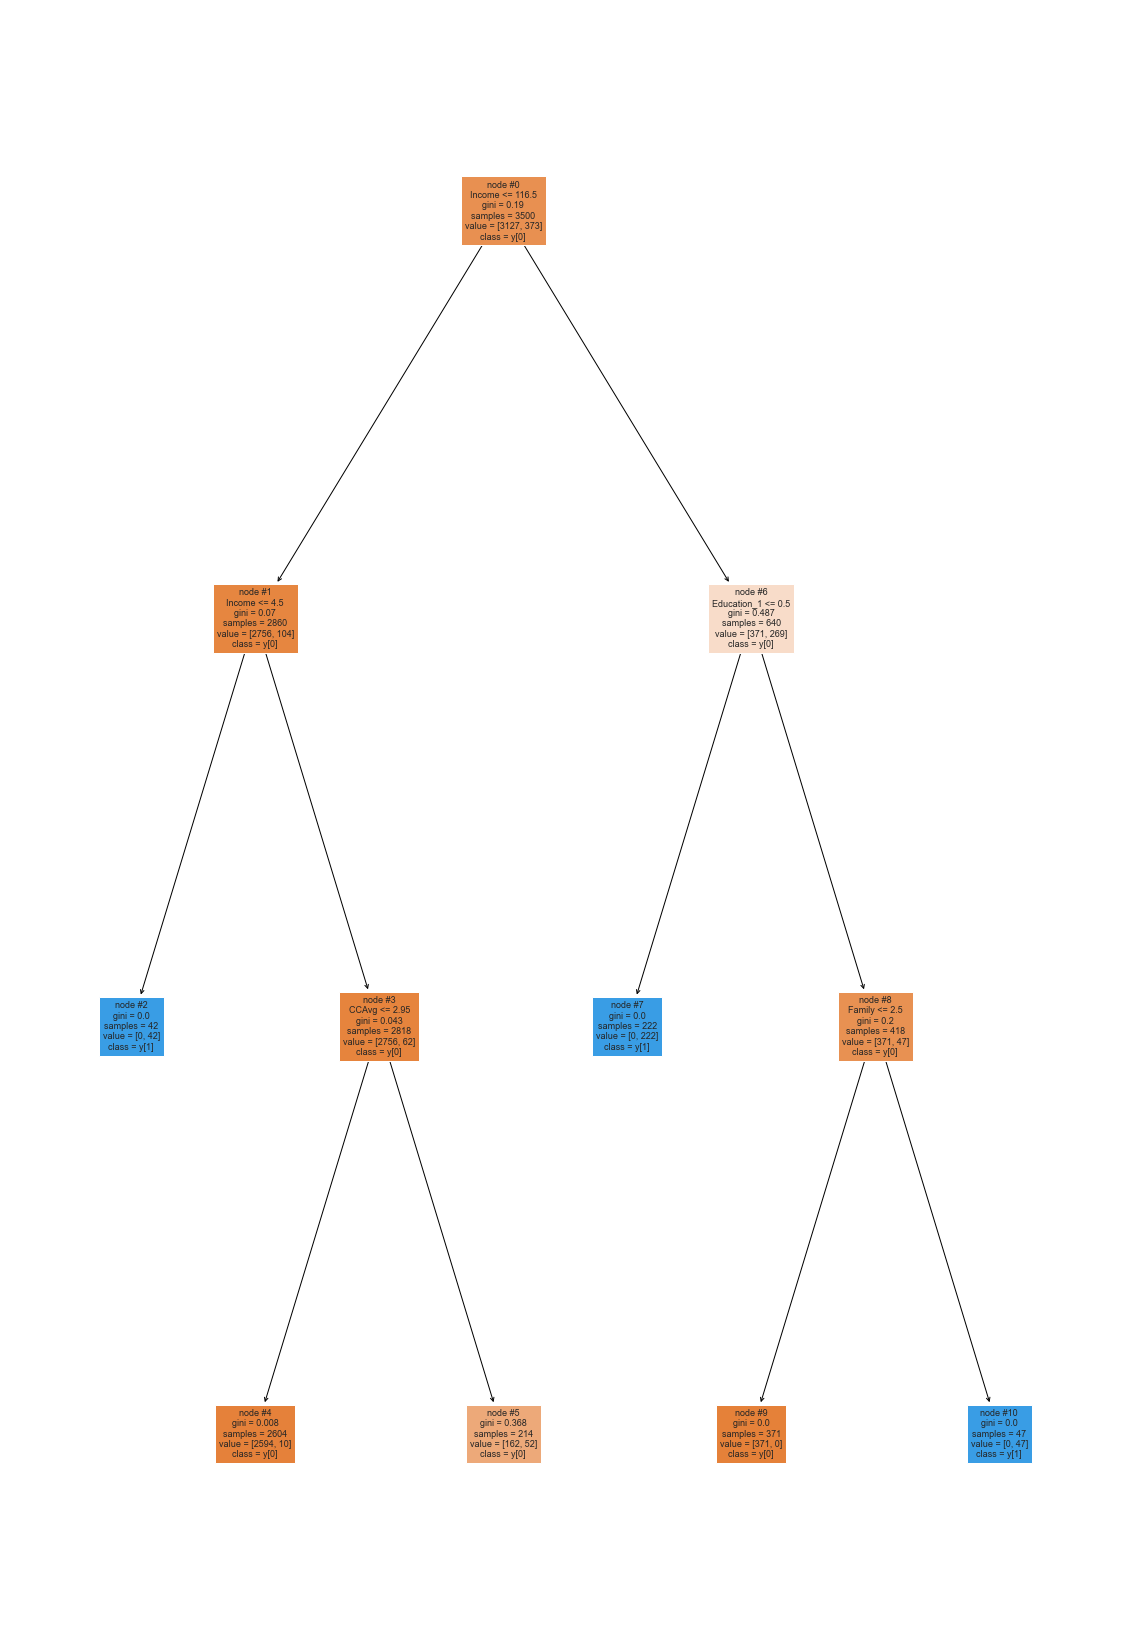

<IPython.core.display.Javascript object>

In [97]:
# Visualize new tree
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

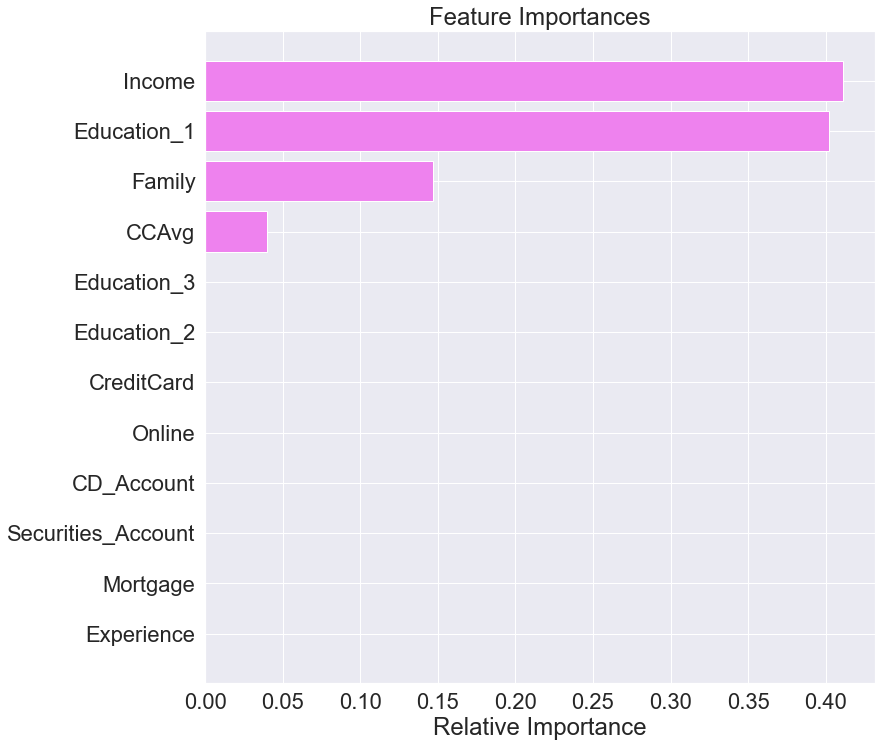

<IPython.core.display.Javascript object>

In [98]:
# List feature importances
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

__Observation:__ Just as before the most important features are Income, Education_1, Family and CCAvg.

In [99]:
# Metrics for post-pruned tree
scores_DT_2 = get_metrics_score2(estimator, x_train, x_test, y_train, y_test)

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8337801608579088
Recall on test set :  0.7672955974842768
Precision on training set :  1.0
Precision on test set :  1.0
F1 on training set :  0.9093567251461989
F1 on test set :  0.8683274021352313


<IPython.core.display.Javascript object>

# 7 - Conclusion

## 7.1 - Comparing All the Models

In [100]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "LR with SKLearn",
            "LR with statsmodels",
            "Decision tree with pre-pruning",
            "Decision tree with post-pruning",
        ],
        "Train_Precision": [0.78, 0.77, 1.00, 1.00],
        "Test_Precision": [0.81, 0.80, 0.91, 1.00],
    }
)
comparison_frame

,Model,Train_Precision,Test_Precision
0,LR with SKLearn,0.78,0.81
1,LR with statsmodels,0.77,0.80
2,Decision tree with pre-pruning,1.00,0.91
3,Decision tree with post-pruning,1.00,1.00


<IPython.core.display.Javascript object>

## 7.2 - Business Insights

* Income, Education_1, Family, and CCAvg (in that order) are the most important variables in determining whether a customer will accept a loan if offered.
* The average customer is 45 years old, has an undergraduate education, is in a two-member family, and spends \$1500 per month on their credit card(s).
* Higher income and higher monthly spending on credit card seems to correspond with acceptance of personal loan.